In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import statsmodels
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv",index_col=0)

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Model Checking


Mengecek model melalui residualnya

In [10]:
feature_cols = ['TV','radio','newspaper']
x = df[feature_cols]
y = df.sales

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fit_intercept true --> dikeluarin

In [15]:
print(lm.intercept_)
lm.coef_

2.9388893694594067


array([ 0.04576465,  0.18853002, -0.00103749])

In [19]:
list(zip(["TV","radio","newspaper"], list(lm.coef_)))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

In [20]:
lm.score(x,y)

0.8972106381789521

# SPLITTING DATA

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [29]:
x_train.shape
x_test.shape

(60, 3)

In [30]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

In [34]:
train_pred_df = pd.DataFrame({'actual':y_train, 
                              'predicted': y_pred_train,
                              'residual':y_train - y_pred_train })

In [35]:
train_pred_df

,actual,predicted,residual
170,15.0,17.941556,-2.941556
98,15.5,15.337078,0.162922
32,11.9,11.346093,0.553907
13,9.2,10.577121,-1.377121
36,12.8,17.006826,-4.206826
120,6.6,6.820068,-0.220068
43,20.7,21.595803,-0.895803
190,6.7,6.051624,0.648376
91,11.2,9.999230,1.200770
137,9.5,11.453486,-1.953486


In [38]:
test_pred_df = pd.DataFrame({'actual':y_test, 
                              'predicted': y_pred_test,
                              'residual':y_test - y_pred_test })
test_pred_df

,actual,predicted,residual
96,16.9,16.314921,0.585079
16,22.4,20.819300,1.580700
31,21.4,21.633934,-0.233934
159,7.3,10.384199,-3.084199
129,24.7,22.255492,2.444508
116,12.6,12.919689,-0.319689
70,22.3,21.108912,1.191088
171,8.4,7.394980,1.005020
175,11.5,13.744357,-2.244357
46,14.9,15.161523,-0.261523


In [39]:
from sklearn import metrics

In [40]:
rmse_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
rmse_train

1.601247667558773

In [41]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
rmse_test

1.815975816200249

In [42]:
metrics.r2_score(y_train,y_pred_train)

0.9022905037730669

In [44]:
metrics.r2_score(y_test,y_pred_test)


0.8792230188851212

Text(0.5,0,'predicted')

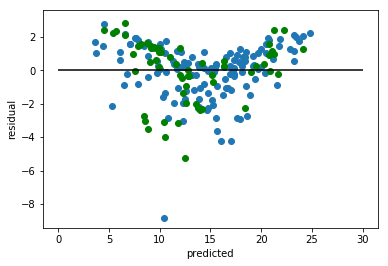

In [54]:
plt.scatter(lm.predict(x_train),y_train - lm.predict(x_train))
plt.scatter(lm.predict(x_test), y_test-lm.predict(x_test),c='g')
plt.hlines(y=0,xmin=0,xmax=30)
plt.ylabel('residual')
plt.xlabel('predicted')

In [55]:
import seaborn as sns

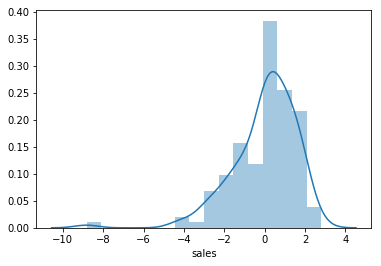

In [57]:
residual_train = y_train - y_pred_train
sns.distplot(residual_train)

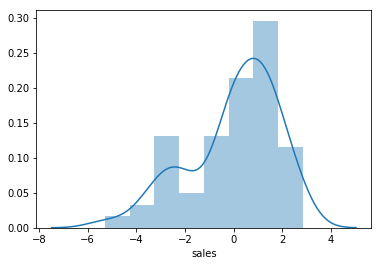

In [58]:
residual_test = y_test - y_pred_test
sns.distplot(residual_test)

### Multikolinearity

In [63]:
from matplotlib.pyplot import cm

In [64]:
corr_df = x_train.corr(method = 'pearson')

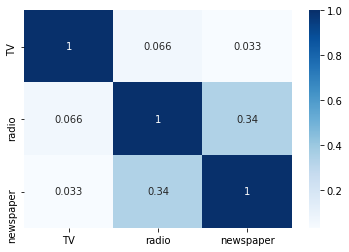

In [69]:
sns.heatmap(corr_df, cmap=cm.Blues, annot=True)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x_train.values,j) for j in range(x_train.shape[1])]

[2.6976786689636088, 3.473818052574502, 3.162643016014367]

### Normality residual

In [76]:
lm2 = smf.ols(formula='sales ~ TV+ radio + newspaper', data=df).fit()

shapiro_walk
H0 : residual normal
H1 : residual tidak normal

In [77]:
from scipy import stats
stats.shapiro(lm2.resid)

(0.9176644086837769, 3.938041004403203e-09)

(0.9176644086837769, 3.938041004403203e-09)
       test                pvalue 

qqplot : normal distribusi reject jika 

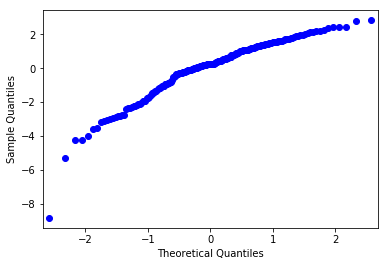

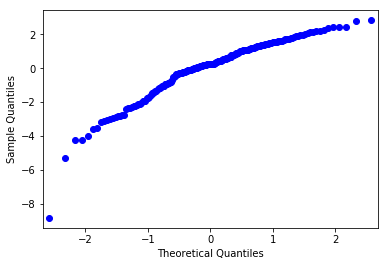

In [78]:
sm.qqplot(lm2.resid)

### Checking Autocorrelation

ljung box test
null hypotesis : no autokorelasi
ha : ada autokorelasi

In [80]:
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(lm2.resid,lags=1)

(array([0.44613369]), array([0.50417674]))

pvalue lebih besar dr 0.05 shg H0 diterima artinya tidak ada autokorelasi

### Check Heteroscedascity
het_goldfeldquandt
H0 : ERROR TERM ARE HOMO...
H1 :  ERROR TERM ARE HETERO

In [86]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
test

(1.3516832040090752, 0.07082060666290767, 'increasing')

In [88]:
#menghitung influence
influence = lm2.get_influence()
resid_student = influence.resid_studentized_external

In [97]:
#menjadikan satu influence value ke tabel xtrain
resid = pd.concat([x_train, pd.Series(resid_student,name='Studentized Residuals')],axis=1)

In [98]:
resid

,TV,radio,newspaper,Studentized Residuals
0,NaN,NaN,NaN,0.946804
1,230.1,37.8,69.2,-1.162079
2,44.5,39.3,45.1,-1.831389
3,17.2,45.9,69.3,0.538774
4,151.5,41.3,58.5,-0.172887
5,180.8,10.8,58.4,-3.288033
6,NaN,NaN,NaN,0.041870
7,57.5,32.8,23.5,0.640993
8,120.2,19.6,11.6,0.645442
9,8.6,2.1,1.0,-1.168564


In [100]:
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]

,TV,radio,newspaper,Studentized Residuals
5,180.8,10.8,58.4,-3.288033
130,59.6,12.0,43.1,-5.757983


In [101]:
#Hapus data yg influence
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
ind

Int64Index([5, 130], dtype='int64')

In [105]:
x_train

,TV,radio,newspaper
170,284.3,10.6,6.4
98,184.9,21.0,22.0
32,112.9,17.4,38.6
13,23.8,35.1,65.9
36,290.7,4.1,8.5
120,19.4,16.0,22.3
43,293.6,27.7,1.8
190,18.7,12.1,23.4
91,134.3,4.9,9.3
137,25.6,39.0,9.3


In [106]:
#Delete data influence dr data 
y_train.drop(ind)
x_train.drop(ind)

,TV,radio,newspaper
170,284.3,10.6,6.4
98,184.9,21.0,22.0
32,112.9,17.4,38.6
13,23.8,35.1,65.9
36,290.7,4.1,8.5
120,19.4,16.0,22.3
43,293.6,27.7,1.8
190,18.7,12.1,23.4
91,134.3,4.9,9.3
137,25.6,39.0,9.3


In [136]:
def plot_learning_curve(model,x,y):
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2) #split the data
    train_errors, val_errors = [], [] #inisialize variable train error dan value error
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])#seiring bertambhanya observasi, mau banidngin rmse dr sisi training dan testing
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+",label="train")
    plt.plot(np.sqrt(val_errors), "b-",label="val")

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

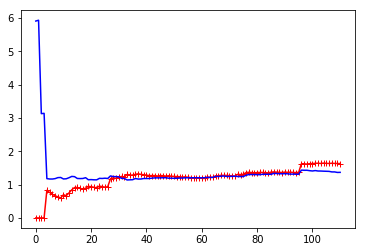

In [146]:
plot_learning_curve(lm,x_train,y_train)

biru garis validasi, merah garis training. jumlah data garis biru lbh kecil dr training set. maka awal2 error tinggi. kalau semakin banyak observation set maka error akan menurn. tapi gak sampe 0. nanti catch up ke garis merah. kalau udah ketemu bisa ambil kesimpulan bahwa sudah stabil